# How to Plot Data

Plotting data requies a little coding. The good news is that it isn't much and most of it can be copy and paste into a 'Code' cell and run once you have included the data.  With a little practice it becomes second nature.  Unlike other tools which require you navigate a fair amount of menus and dialogs you are left with a complete record of the steps you used and can use again for the next plot.

As with other HOWTO guides this document is meant to be interactive. Make a copy of it and try the things presented here and let it become your own reference.

## Introduction

This notebook tries to collect a variety of ways in which we use plotting in physical science, specifically physics. Like all the other '**HOWTO**'s this document is meant to be copied, examined and modified and used as starting point for your own reference.  Open the examples, copy what you need but if you learn something new add it to your list so you'll have a copy for your own use.

This is, potenitally, a vast topic made more complex by the incredibly vast library afforded by `matplotlib`.  Add to this an almost infinite variety of opinions and viewpoints on how data can be presented graphically and there would be no end.  

Here the idea is to keep the list of instructions simple to create a model for presenting graphs but not make it too complicated. `matplotlib.pyplot` like it's parent object `matplotlib` is a complex package that provides a rich set of tools for data visualization.  The result is that there are multiple ways to do anything. Different online resources, collectively, reveal lots of different ways to do even simple tasks.

**History** of sorts...

`matplotlib` is the master library which allows you to do almost anything with data visualization.  The daughter library, `pyplot`, is designed around a '*state driven*', functional interface which allows the user to create plots 'on the fly' by issuing commands that change the 'state' of a graph as you go.  A final command (or method), `.show()` ends the process by forcing the rendered graph to the output.  Each command can, along the way, affect how the final product will behave. This is very convenient and follows how other 'notebook' systems work but can give different results with the order in which things are done.

The alternative is the '*object oriented*' approach where you reference or extract objects which have methods that control and modify the appearance of each element in the graph. This allows laser precision over the what is being changed and when.  [There is an overview of these approaches](https://matplotlib.org/matplotblog/posts/pyplot-vs-object-oriented-interface/) in the documentation.

The source for most the commands themselves is in the [mathplotlb tutorial](https://matplotlib.org/3.3.3/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py).  The mission here is to go down the many rabbit holes in this library to simplify the process for those just starting out.  To that end...

**Assumptions Throughout:**
We are using this in the context of physical science and engineering classes.
  - discrete measrements (from experiment, for example) are plotted as points without connecting lines.[$^\dagger$](#scrollTo=JWUS-oJrI1gC&line=1&uniqifier=1)
  - continuous plots (such as from a model) are expressed as smoothed lines.[$^\dagger$](#scrollTo=JWUS-oJrI1gC&line=1&uniqifier=1) 
  - all values are, ultimately, measurements and have units and precision.
  - graphs should be labeled and provided with appropriate units. 
  - the examples here are incremental from simple to complex as we go down the sheet. 
    - The incremental complexity, in many cases, involves simply copying and pasting the code from the previous section with a few additions.
    - Take the time to notice what is essentially the same from the simpler actions and the additions to provide further features.



In all the examples below we will assume that the data comes in two simple 1D arrays of the same size with x values in one and y values in the other.  For the graphing routines we will be using this is how the input is handled.  In some cases data may be organized in other forms but it is fairly simple to rearrarange the values to create the two sets of arrays described above.

```python
# discrete values in separate arrays (both of the same length)
x_values = np.array([x_0, x_1, ...])
y_values = np.array([y_0, y_1, ...])

# discrete values as pairs in a single array (another common way to organize data)
all_data = np.array([
                      [x_0, y_0],
                      [x_1, y_1],
                      [x_2, y_2],
                      ...
                    ])

# to extract the seperate values to look like the first case
[x_values, y_values] = all_data.T
# †if you are familiar with the concept of a transpose that is what the method .T is doing
```

In [ ]:
#@title Import libraries
import numpy as np
import matplotlib.pyplot as plt


#### Footnotes

$^\dagger$ <font size="-1">For those more familiar with computer methods know that all the sets of values are discrete. What is meant in the two examples presented here: 1) discrete refers to a small set of measurements from some system being studied *vs* 2) a formula which generates model data based on inputs whose value and number we control: a model. The ultimate power of physical science and engineering is to match models with the experiments to make predictions. As such, we illustrate experimental values as individual points. Since we control our model values, however, the discrete points take a back seat to the overall shape of the pattern they produce.</font>

# Basic Plots

Plotting with the `matplotlib.pyplot` library involves surprisingly few steps. Assuming you have imported the library and have data in the form of a list pairs of values or two one dimensional arrays (one for the x axis and one for the y) plotting takes the following logical steps:
```
plot the data
title the plot
label the x axis
label the y axis
tweak the appearance: 
   show the grid, 
   limit the range of the axis if needed
show the plot 
```


In [ ]:
#@title Fake data for the purpose of the example
# fake data that might be read from a file or entered from a series of measurements
indepValues = np.linspace(0.1, 1.6, num=9)  
depValues = np.linspace(0.0, 2.6, num=9)+np.random.normal(scale=0.1, size=9)  # fake y values with a little noise

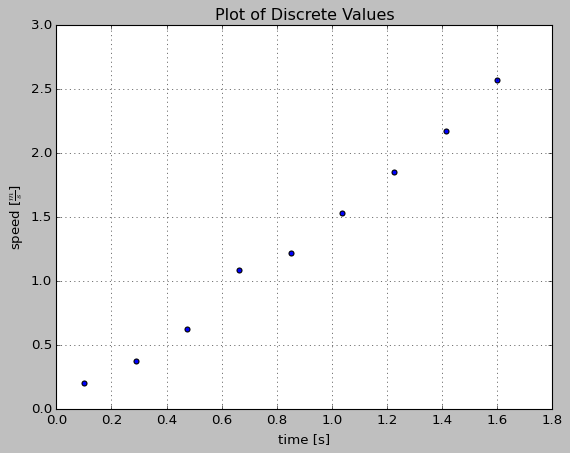

In [ ]:
#@title Data Plots
#@markdown *Lines tagged as 'optional' may be excluded*

#optional: Choose a style (many choices but can be useful as some graphs don't show up well with different display themes)
plt.style.use("classic") #ggplot, seaborn-poster, seaborn-notebook also work

#@markdown Discrete measurements from experiments should always be plotted as 'points' without connecting lines. 
# Optional parameters may be excluded.
plt.scatter(indepValues, depValues,
            c='blue',      # optional: spells the color of the marker
            marker='o',    # optional: type of marker, (useful if you superimpose graphs)
                           #           dozens of options: + < > ^ v o p s x  to name a few
            alpha = 1.0,   # optional: sets transparency 0-invisible to 1-opaque
                           #           useful if points overlap or are on top of another graph
          )

# Always label your axes and plots
plt.title("Plot of Discrete Values")
plt.xlabel("time [s]")
plt.ylabel(r"speed [$\frac{m}{s}$]")  # embed LaTeX (r is needed so the backslash doesn't get interpreted)

# Display a grid so people can extrapolate
plt.grid(True)

# Force the display of the origin (0,0)
#    optional in some cases but necessary if you are trying to decide on how to 
#    fit values or testing a linearization method is working (assumes direct 
#    relationships) 
plt.xlim(left=0.0)  # optional: force the presentation of 0 on the x axis
plt.ylim(bottom=0.0)  # optional: force the presentation of 0 on the y axis

# show the graph.
plt.show()

In [ ]:
#@title Fake data for the purpose of the example
# model data meant to be from a mathematical model
model_time = np.linspace(0.0, 20.0, num=100)  # default is 50 values more makes for smoother appearance
model_values = np.sin( model_time ) * np.exp( -model_time / 4.0 )

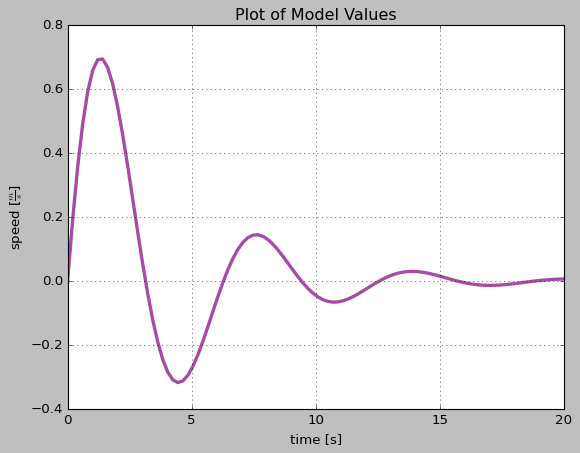

In [ ]:
#@title Model Plots
#@markdown *Lines tagged as 'optional' may be excluded*

#optional: Choose a style (many choices but can be useful as some graphs don't show up well with different display themes)
plt.style.use("classic")

#@markdown Continuous measurements from models should be plotted as a curve.
plt.plot(model_time, model_values,
         c='purple',       # optional: spells the color of the marker
         linestyle = "-",  # optional: line style, options: '-' '--' '-.' ':'  to name a few
         linewidth = 3.0,  # optional
            alpha = 0.7,   # optional: sets transparency 0-invisible to 1-opaque
                           #           useful if lines overlap or are on top of a plot
         )

# Always label your axes and plots
plt.title("Plot of Model Values")
plt.xlabel("time [s]")
plt.ylabel(r"speed [$\frac{m}{s}$]")  # embed LaTeX (r is needed so the backslash doesn't get interpreted)

# display a grid so people can extrapolate
plt.grid(True)

plt.show()

# Mulitple Graphs

## Mutliple datasets
Many times it is useful to plot mutliple experimental values on the same graph. The example below assumes that the values share the same independent value but if each plot has its own source of independent values then simply replace the instance of `indepValues` with that for each set.

In [ ]:
#@title Fake data for the purpose of the example
# Generate a few different sets sharing the same x values
indepValues = np.linspace(0.1, 1.6, num=9)  
depValues1 = np.linspace(0.0, 2.6, num=9)+np.random.normal(scale=0.1, size=9)  # fake y values set 1
depValues2 = np.linspace(0.0, 2.6, num=9)+np.random.normal(scale=0.1, size=9)  # fake y values set 2
depValues3 = np.linspace(0.0, 2.6, num=9)+np.random.normal(scale=0.1, size=9)  # fake y values set 3


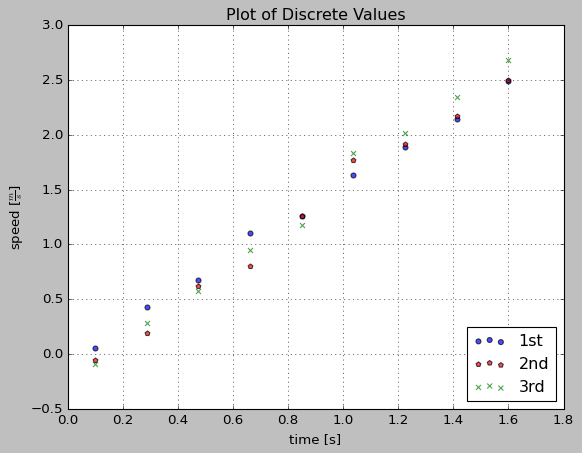

In [ ]:
#@title Mutliple data sets on the same graph
#@markdown *Lines tagged as 'optional' may be excluded*

#optional: Choose a style (many choices but can be useful as some graphs don't show up well with different display themes)
plt.style.use("classic")

#@markdown Just repeat successive plots . 
# Optional parameters may be excluded.
plt.scatter(indepValues, depValues1,
            c='blue',      # optional: spells the color of the marker
            marker='o',    # optional: type of marker, (useful if you superimpose graphs)
                           #           dozens of options: + < > ^ v o p s x  to name a few
            alpha = 0.7,   # optional: sets transparency 0-invisible to 1-opaque
                           #           useful if points overlap or are on top of another graph
            label='1st',  # important for displaying a legend
          )
plt.scatter(indepValues, depValues2,
            c='red',      # optional: spells the color of the marker
            marker='p',    # optional: type of marker, (useful if you superimpose graphs)
                           #           dozens of options: + < > ^ v o p s x  to name a few
            alpha = 0.7,   # optional: sets transparency 0-invisible to 1-opaque
                           #           useful if points overlap or are on top of another graph
            label='2nd',  # important for displaying a legend
          )
plt.scatter(indepValues, depValues3,
            c='green',      # optional: spells the color of the marker
            marker='x',    # optional: type of marker, (useful if you superimpose graphs)
                           #           dozens of options: + < > ^ v o p s x  to name a few
            alpha = 0.7,   # optional: sets transparency 0-invisible to 1-opaque
                           #           useful if points overlap or are on top of another graph
            label='3rd',  # important for displaying a legend
          )

# Always label your axes and plots
plt.title("Plot of Discrete Values")
plt.xlabel("time [s]")
plt.ylabel(r"speed [$\frac{m}{s}$]")  # embed LaTeX (r is needed so the backslash doesn't get interpreted)

# show a legend and where (may have to repeat a plot to choose a good location)
#    picks up labels in the plot above
plt.legend(loc='lower right' )  # can be 'upper left', 'upper right', 'lower left', 'lower right'

# Display a grid so people can extrapolate
plt.grid()

# Force the display of the origin (0,0)
#    optional in some cases but necessary if you are trying to decide on how to 
#    fit values or testing a linearization method is working (assumes direct 
#    relationships) 
plt.xlim(left=0.0)  # optional: force the presentation of 0 on the x axis

# show the graph.
plt.show()

## A data set and its fit
To gauge a fit we need to see it's model superimposed on its data.

In [ ]:
#@title Fake data for the purpose of the example
# Generate a few different sets sharing the same x values
indepValues = np.linspace(0.1, 1.6, num=9)  
depValues = np.linspace(0.0, 2.6, num=9)+np.random.normal(scale=0.1, size=9)  # fake y values set 1


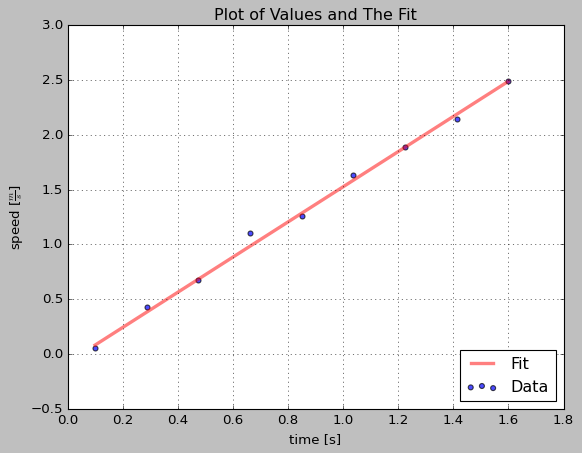

slope:     1.60 m/s^2, intercept:    -0.08 m/s


In [ ]:
#@title Plot a data set with its fit.
#@markdown *Lines tagged as 'optional' may be excluded*

#optional: Choose a style (many choices but can be useful as some graphs don't show up well with different display themes)
plt.style.use("classic")

#@markdown Just repeat successive plots . 
# Optional parameters may be excluded.
plt.scatter(indepValues, depValues1,
            c='blue',      # optional: spells the color of the marker
            marker='o',    # optional: type of marker, (useful if you superimpose graphs)
                           #           dozens of options: + < > ^ v o p s x  to name a few
            alpha = 0.7,   # optional: sets transparency 0-invisible to 1-opaque
                           #           useful if points overlap or are on top of another graph
            label='Data',  # important for displaying a legend
          )

# generate a linear fit (there is separte section to see the choices available here)
# we want to build a model that looks like y = m * x + b
(m,b) = np.polyfit(indepValues, depValues, 1) #  

# Superimpose a plot of the fit (notice this is a model so we 'plot' a line)
plt.plot(indepValues, m*indepValues + b,
            c='red',      # optional: spells the color of the marker
            linewidth=3,  # optional: type of marker, (useful if you superimpose graphs)
                          #           dozens of options: + < > ^ v o p s x  to name a few
            alpha = 0.5,  # sets transparency to about 0.5 - 0.7 
                          #           so we can see the points underneath
            label='Fit',  # important for displaying a legend
          )


# Always label your axes and plots
plt.title("Plot of Values and The Fit")
plt.xlabel("time [s]")
plt.ylabel(r"speed [$\frac{m}{s}$]")  # embed LaTeX (r is needed so the backslash doesn't get interpreted)

# show a legend and where (may have to repeat a plot to choose a good location)
#    picks up labels in the plot above
plt.legend(loc='lower right' )  # can be 'upper left', 'upper right', 'lower left', 'lower right'

# Display a grid so people can extrapolate
plt.grid()

# Force the display of the origin (0,0)
#    optional in some cases but necessary if you are trying to decide on how to 
#    fit values or testing a linearization method is working (assumes direct 
#    relationships) 
plt.xlim(left=0.0)  # optional: force the presentation of 0 on the x axis

# show the graph.
plt.show()

# Print out the fit values WITH THEIR UNITS!
print(f"slope: {m:8.2f} m/s^2, intercept: {b:8.2f} m/s")


## Multiple plots with the with a shared x axis

This is especially useful where you have events correlated with the same independent value. Common examples might be x and y motion vs a shared time or a position, velocity and acceleration graph stacked on top of one another.

In [ ]:
#@title Fake data for the purpose of the example
timeSample = np.linspace(0.0, 4.0) # sec default 50 values 
posSample = -0.75*timeSample**3   + 3.1 * timeSample**2 + 5 * timeSample # m
velSample = -0.75*timeSample**2/3 + 3.1 * timeSample/2 + 5               # m/s
accSample = -0.75*timeSample/6    + 3.1/2                                # m/s^2

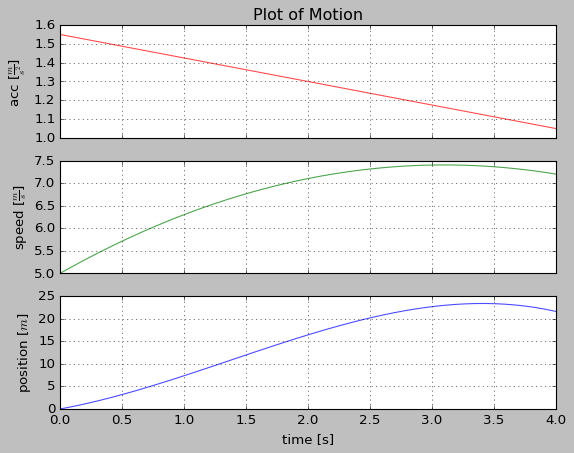

In [ ]:
#@title Mutliple data sets on the same graph
#@markdown *Lines tagged as 'optional' may be excluded*

#optional: Choose a style (many choices but can be useful as some graphs don't show up well with different display themes)
plt.style.use("classic")

#@markdown Like before, we repeat plots but each is on its own.

########################################################
# start by defining the number and organization of the plots with the first
# set up the first graph
plt.subplot(311)  # nmi n-rows, m-columns, i-index: the current plot.

########################################################
# plot the first, topmost graph
plt.plot(timeSample, accSample,
            c='red',       # optional: spells the color of the marker
            alpha = 0.7,   # optional: sets transparency 0-invisible to 1-opaque
                           #           useful if points overlap or are on top of another graph
            label='acc',   # important for displaying a legend
          )
#label axis, n.b. x-axis is omitted (save until end)
plt.ylabel(r"acc [$\frac{m}{s^2}$]")  # embed LaTeX (r is needed so the backslash doesn't get interpreted)
                                      # x-axis is omitted (save until end)

# turn off the xlabels (they will appear at the bottom)
plt.gca().axes.set_xticklabels([])

# show a grid
plt.grid()

# The top graph gets a title
plt.title("Plot of Motion")

########################################################
# change to second, middle graph (same command as above, only the last index changes)
plt.subplot(312)  # nmi n-rows, m-columns, i-index: the current plot is the second one

plt.plot(timeSample, velSample,
            c='green',      # optional: spells the color of the marker
            alpha = 0.7,   # optional: sets transparency 0-invisible to 1-opaque
                           #           useful if points overlap or are on top of another graph
            label='vel',   # important for displaying a legend
          )
#label axis, n.b. x-axis is omitted (save until end)
plt.ylabel(r"speed [$\frac{m}{s}$]")  # embed LaTeX (r is needed so the backslash doesn't get interpreted)
                                      # x-axis is omitted (save until end)

# turn off the xlabels (they will appear at the bottom)
plt.gca().axes.set_xticklabels([])

# show a grid
plt.grid()

########################################################
# change to third, bottom graph (same command as above, only the last index changes)
plt.subplot(313)  # nmi n-rows, m-columns, i-index: the current plot is the third one

# Optional parameters may be excluded.
plt.plot(timeSample, posSample,   # first plot 
            c='blue',      # optional: spells the color of the marker
            alpha = 0.7,   # optional: sets transparency 0-invisible to 1-opaque
                           #           useful if points overlap or are on top of another graph
            label='pos',   # important for displaying a legend
          )
#label axis, n.b. now we label the shared x-axis
plt.ylabel(r"position [$m$]")  # embed LaTeX (r is needed so the backslash doesn't get interpreted)

# show a grid
plt.grid()

# The bottom graph gets an xlabel
plt.xlabel("time [s]")

# show the graph.
plt.show()

### alternative object orientated approach

The above example has more elegant solutions which can provide a bit more compaction and control at the expense of added complexity.  The method applied above takes full advantage of the '*state driven*' mode of plotting where each command creates a new context for the next command. This isn't always desirable as we had to issue some commands in a certain order and changing that order would have shown a completely different graph.  

Example: If I had waited until the 3rd graph was plotted and then issued the `plt.title` method the title would have appeared over the bottom most graph which is not desirable.

The alternative is to take full control of each graph referred to as the '*object*' approach and use a variant of the subplots command
```python
fig, plts = plt.subplots(3, sharex=True)
# first, top plot
plts[0].plot...
plts[0].set(ylabel=...
# second, middle plot
plts[1].plot...
plts[1].set(ylabel=...
# third, bottom plot
plts[2].plot...
plts[2].set(ylabel=..., xlabel=...

fig.suptitle("Overall Title")
```
Notice that the command to change the label for the plots changes (no `.ylabel` or `.xlabel` method)

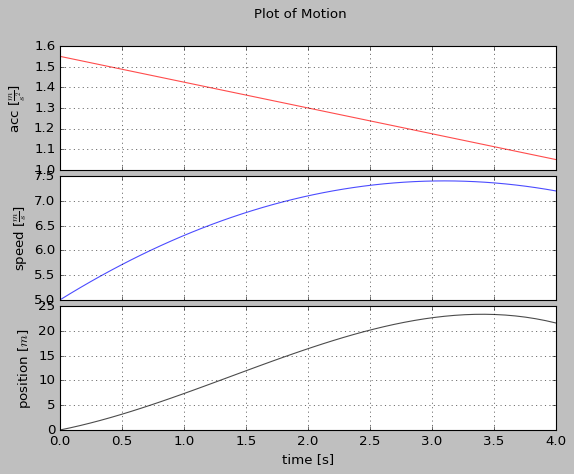

In [ ]:
#@title Mutliple data sets on the same graph
#@markdown *Lines tagged as 'optional' may be excluded*

#optional: Choose a style (many choices but can be useful as some graphs don't show up well with different display themes)
plt.style.use("classic")

#@markdown Like before, we repeat plots but each is on its own.

########################################################
# start by defining the number and organization of the plots with the first
# set up the first graph
fig, plts = plt.subplots(3, 1, 
                         sharex=True,
                         squeeze=True,
                         )  # n rows, m columns, index: the current plot.

# The graph title is applied to the outer figure
fig.suptitle("Plot of Motion")
fig.subplots_adjust(hspace=0.05)


########################################################
# plot the topmost graph
plts[0].plot(timeSample, accSample,
            c='red',       # optional: spells the color of the marker
            alpha = 0.7,   # optional: sets transparency 0-invisible to 1-opaque
                           #           useful if points overlap or are on top of another graph
            label='acc',   # important for displaying a legend
          )
#label axis, n.b. x-axis is omitted (save until end)
plts[0].set(ylabel = r"acc [$\frac{m}{s^2}$]")  # embed LaTeX (r is needed so the backslash doesn't get interpreted)

# show a grid
plts[0].grid()

########################################################
# change to second graph (only the last index changes)
plts[1].plot(timeSample, velSample,
            c='blue',      # optional: spells the color of the marker
            alpha = 0.7,   # optional: sets transparency 0-invisible to 1-opaque
                           #           useful if points overlap or are on top of another graph
            label='vel',   # important for displaying a legend
          )
#label axis, n.b. x-axis is omitted (save until end)
plts[1].set(ylabel=r"speed [$\frac{m}{s}$]")  # embed LaTeX (r is needed so the backslash doesn't get interpreted)
                                      # x-axis is omitted (save until end)
# show a grid
plts[1].grid()

########################################################
# change to third graph (only the last index changes)
# Optional parameters may be excluded.
plts[2].plot(timeSample, posSample,   # first plot 
            c='black',      # optional: spells the color of the marker
            alpha = 0.7,   # optional: sets transparency 0-invisible to 1-opaque
                           #           useful if points overlap or are on top of another graph
            label='pos',   # important for displaying a legend
          )
#label axis, n.b. now we label the shared x-axis
plts[2].set(ylabel=r"position [$m$]")  # embed LaTeX (r is needed so the backslash doesn't get interpreted)
# show a grid
plts[2].set(xlabel="time [s]")
plts[2].grid()




# show the graph.
plt.show()

# Unsual cases (polar plots, log-log, log-linear, etc)

## Overview

There is little difference here than what you have seen before.  All that happens is that we can tell `pyplot` to re-organize how grids are presented to give us some special effects. In general the expectation that if you need one of these special forms you should already have an idea as to why they are important. In summary,
  - **Polar Plots** are made when the independent value is an angle in some form and the dependent values are controlled by that value.
  - **Log Plots** are used where the range of values span orders of magnitude rather than a small range.  These graphs are common in many areas of science and do require some getting used to.

## Polar Plots

In [ ]:
#@title Fake data for the purpose of the example
# fake data that might be read from a file or entered from a series of measurements
indepValues = np.linspace(0, 2*np.pi, num=15)  
depValues = 2*indepValues+np.random.normal(scale=0.1, size=len(indepValues))  # fake y values

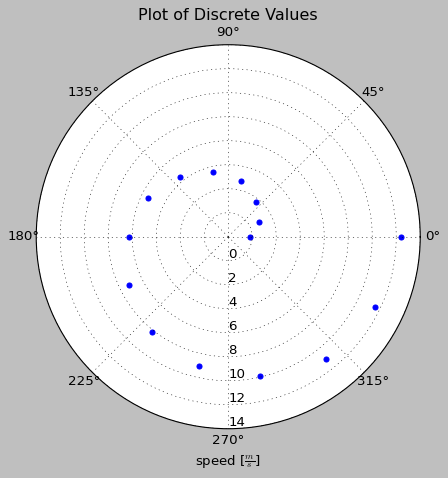

In [ ]:
#@title Data Plots in Polar Coordinates
#@markdown *Lines tagged as 'optional' may be excluded*

# We have to do use the  object oriented method to get the right control
# the commands are logically similar to regular plotting but notice that they
# are associated with the object that plt.subplot returns

ax = plt.subplot(111, projection="polar")
# the only real difference is that we 

#@markdown Discrete measurements from experiments should always be plotted as 'points' without connecting lines. 
# Optional parameters may be excluded.
ax.scatter(indepValues, depValues,
            color='blue',  # optional: color of
            marker='o',    # optional: type of marker, (useful if you superimpose graphs)
                           #           dozens of options: + < > ^ v o p s x  to name a few
            alpha = 1.0,   # optional: sets transparency 0-invisible to 1-opaque
                           #           useful if points overlap or are on top of another graph
          )

# Always label your axes and plots
ax.set_title("Plot of Discrete Values")

ax.set_xlabel(r"speed [$\frac{m}{s}$]")
ax.set_rlabel_position(-90)  # Move radial labels to specific angle from plotted line

# Display a grid so people can extrapolate
ax.grid(True)

# show the graph.
plt.show()

## Log-Log and Log-Linear Plots

### Log-Linear

In [ ]:
#@title Fake data for the purpose of the example
# fake data that might be read from a file or entered from a series of measurements
frequencies = 10**np.linspace(2.0, 6.0, num=25)   # fake x values [Hz]
signalStrength = np.exp(- 6542./frequencies )  # fake x values [V]

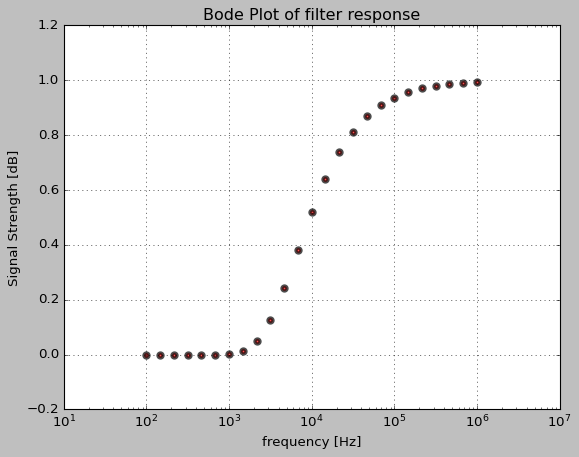

In [ ]:
#@title Data Plots in Log-Linear coordinates
#@markdown *Lines tagged as 'optional' may be excluded*

#optional: Choose a style (many choices but can be useful as some graphs don't show up well with different display themes)
plt.style.use("classic")

#Commonly used to present data from a high pass filter in electronics
#@markdown Continuous measurements from models should be plotted as a curve.
plt.scatter(frequencies, signalStrength,
         c='red',       # optional: spells the color of the marker
         linestyle = "-",  # optional: line style, options: '-' '--' '-.' ':'  to name a few
         linewidth = 3.0,  # optional
            alpha = 0.7,   # optional: sets transparency 0-invisible to 1-opaque
                           #           useful if lines overlap or are on top of a plot
         )

# everything else is as you would expect for a normal linear-linear plot except for the following two lines.
plt.xscale("log")  
plt.yscale("linear")  # put here for emphasis, this is the default.

# Always label your axes and plots
plt.title("Bode Plot of filter response")
plt.xlabel("frequency [Hz]")
plt.ylabel("Signal Strength [dB]")  # embed LaTeX (r is needed so the backslash doesn't get interpreted)

# display a grid so people can extrapolate
plt.grid()

plt.show()

### Log-Log

In [ ]:
#@title Fake data for the purpose of the example
# fake data that might be read from a file or entered from a series of measurements
orbitalPeriods = np.array([5.2, 32.7967, 81.4138, 232.282, 455.6])  # fake period values [T^2]
orbitalRadii = np.array([13.2, 45.0785, 82.6229, 166.26, 260.498])  # fake orbital radii values [L^3]

Suppose you have some data from, say orbital periods and radii. You know there is some kind of power law relationship between them but not sure what.  You could do a series of guess and checks or you could do a log-log plot to find the exponents.

The idea is this, you have orbital radii information in the dimensions of [L]
and time information in the form of [T] and you suspect that there is a connection that looks like:
$$ r^n\propto T^m$$
but what are m and n.  You know they have to be integers but not much else.  So suppose you take the log of both sides?
$$ n \log(r)\propto m \log(T) \implies \log(r) \propto \frac{m}{n}\log(T)$$
so if you plot on a log-log plot and look at the slope which you know has to be an integer or ratio of integers you have your relationship.


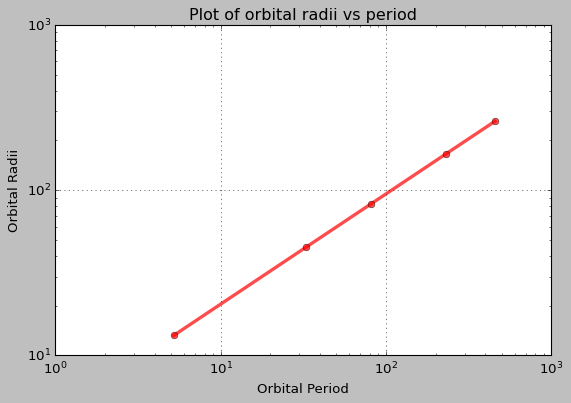

In [ ]:
#@title Data Plots in Log-Log coordinates
#@markdown *Lines tagged as 'optional' may be excluded*

#optional: Choose a style (many choices but can be useful as some graphs don't show up well with different display themes)
plt.style.use("classic")

#Commonly used to present data from a high pass filter in electronics
#@markdown Plot the data as given...
plt.plot(orbitalPeriods, orbitalRadii,
         c='red',       # optional: spells the color of the marker
         marker = "o",
         linestyle = "-",  # optional: line style, options: '-' '--' '-.' ':'  to name a few
         linewidth = 3.0,  # optional
            alpha = 0.7,   # optional: sets transparency 0-invisible to 1-opaque
                           #           useful if lines overlap or are on top of a plot
         )

# everything else is as you would expect for a normal linear-linear plot except for the following two lines.
#@markdown ...but change the scales to logarithmic
plt.xscale("log")  
plt.yscale("log")  # put here for emphasis, this is the default.

# Always label your axes and plots
plt.title("Plot of orbital radii vs period")
plt.xlabel("Orbital Period")
plt.ylabel("Orbital Radii")  # embed LaTeX (r is needed so the backslash doesn't get interpreted)

# in order for this to work we need to set the aspect ratio so it is 1.0
# VERY IMPORTANT: the x and y scale must be the same.
plt.gca().set_aspect(1.0)

# display a grid so people can extrapolate
plt.grid()

plt.show()

From the graph it looks like the log(orbital radii) rises 3.5cm as the log(orbital period) runs for 5.3cm.  This makes the ratio of the powers of $\frac{m}{n} \approx \frac{2}{3}$ So you might try to linearize the graph by plotting `orbitalRadii**3` vs `orbitalPeriod**2` and see what happens:

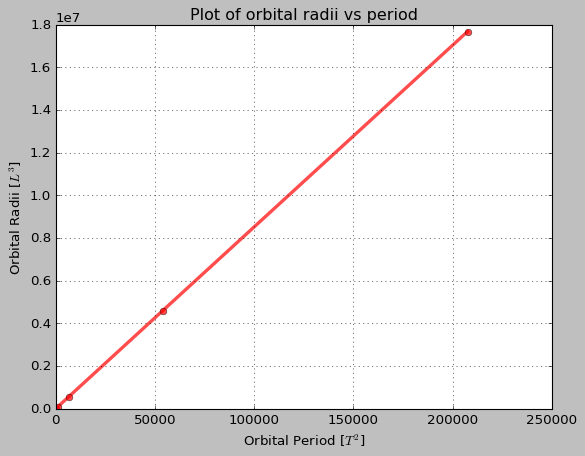

In [ ]:
#@title Follow up to log-log graph with linearization
#@markdown *Lines tagged as 'optional' may be excluded*


#optional: Choose a style (many choices but can be useful as some graphs don't show up well with different display themes)
plt.style.use("classic")

#
#@markdown Notice how all the code is identical to the log-log plot except for the power law on the inputs
plt.plot(orbitalPeriods**2, orbitalRadii**3,
         c='red',       # optional: spells the color of the marker
         marker = "o",
         linestyle = "-",  # optional: line style, options: '-' '--' '-.' ':'  to name a few
         linewidth = 3.0,  # optional
            alpha = 0.7,   # optional: sets transparency 0-invisible to 1-opaque
                           #           useful if lines overlap or are on top of a plot
         )

# This and the line above are the only difference.
plt.xscale("linear")  
plt.yscale("linear")  # put here for emphasis, this is the default.

# Always label your axes and plots
plt.title("Plot of orbital radii vs period")
plt.xlabel(r"Orbital Period [$T^2$]")
plt.ylabel(r"Orbital Radii [$L^3$]")  # embed LaTeX (r is needed so backslashes don't get interpreted)

# display a grid so people can extrapolate
plt.grid()

plt.show()

The slope might even tell you something about the mass of the gravitational attractor.

# Fitting data to functional forms

## Introduction

While fitting experimental results to functional forms is worthy of a 'HOWTO' all by itself, it is intimately tied to graphing data that it is best kept with the graphing details.

Experimental data is fraught with noise. Even the best attempts to get precise measurements are often plagued by random fluctuations. As a consequence when we match data to experimental models we often have an idea of a specific model in mind that should match our measurements.  A failure to match the model may mean the model is off or the experiment had some breakdown.  Figuring which of these problems is the cause is where all the hard work is.

## Linear Fit



The simplest model we can usually apply is a *linear relationship*. The *direct relationship*, where the y-intercept is expected to be 0, is a special case.

We have a set of data and are trying to get a set of parameters $m$ and $b$ where the y-values can be predicted from the x-values with a formula like:
$$y = m\;x + b\tag{FD.1}$$

For this we usually use a least-square fit which will yield the results.  Our numpy library has a routine for getting these parameters simply.
```python
# Linear fit y = m x + b
(m, b)=np.polyfit(indepValues, depValues, 1)  # 1 for linear fit, 2 for quadratic, etc.
print(f"y = {m:5.3f} x + {b:5.3f}")
print(f"slope: {m:5.3f} [units]")
print(f"intercept: {b:5.3f} [units]")
```

```python
# Quadratic fit y = a x^2 + b x + c
(a, b, c)=np.polyfit(indepValues, depValues, 2)  # 1 for linear fit, 2 for quadratic, etc.
print(f"y = {a:5.3f} x^2 + {b:5.3f} x + {c:5.3f}")
print(f"slope: {m:5.3f} [units]")
print(f"intercept: {b:5.3f} [units]")
```


In [ ]:
#@title Fake data for the purpose of the examples
# fake data that might be read from a file or entered from a series of measurements
fuzz = 0.3  # make larger for more noise

indepValues = np.linspace(0.1, 1.6, num=9)  
depValues = 3.1*indepValues+np.random.normal(scale=fuzz, size=9)  # fake y values with a little noise
# print(np.array([indepValues,depValues]).T)

y = 3.453 x + -0.319
slope: 3.453 m/s^2
intercept: -0.319 m/s


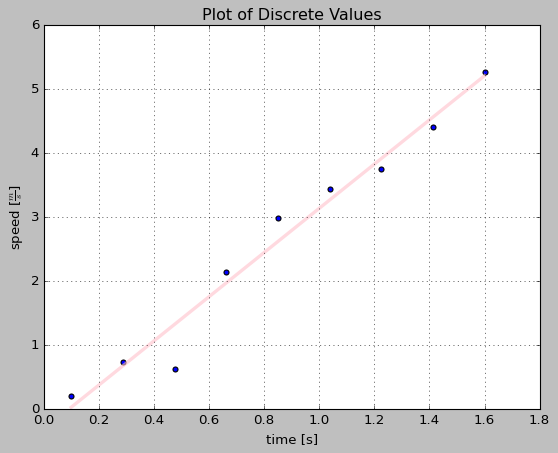

In [ ]:
#@title Plot the data with a fit on top
#@markdown *Skip steps to streamline plotting*

#### We want to display the data with the fit superimposed
plt.style.use("classic") #ggplot, seaborn-poster, seaborn-notebook also work

#### Plot the data
plt.scatter(indepValues, depValues,
            c='blue',      # optional: spells the color of the marker
            marker='o',    # optional: type of marker, (useful if you superimpose graphs)
          )

# Always label your axes and plots
plt.title("Plot of Discrete Values")
plt.xlabel("time [s]")
plt.ylabel(r"speed [$\frac{m}{s}$]")  # embed LaTeX (r is needed so the backslash doesn't get interpreted)

# Display a grid so people can extrapolate
plt.grid(True)

# Force the display of the origin (0,0)
#    optional in some cases but necessary if you are trying to decide on how to 
#    fit values or testing a linearization method is working (assumes direct 
#    relationships)
plt.xlim(left=0.0)  # optional: force the presentation of 0 on the x axis
plt.ylim(bottom=0.0)  # optional: force the presentation of 0 on the y axis

#############################################################################
# Here is the bare bones fit
(m,b)=np.polyfit(indepValues, depValues, 1)  # 1 for linear fit, 2 for quadratic, etc.
print(f"y = {m:5.3f} x + {b:5.3f}")
print(f"slope: {m:5.3f} m/s^2")
print(f"intercept: {b:5.3f} m/s")
#
#############################################################################

#### Plot the fit on top.
plt.plot(indepValues, m * indepValues + b,
            c='pink',      # optional: spells the color of the marker
            alpha = 0.6,   # optional: sets transparency 0-invisible to 1-opaque
            linewidth = 3.0,
          )

#### now show the graph
plt.show()


y = 3.146 x + -0.032
slope: 3.146±0.265 m/s^2
intercept: -0.032±0.259 m/s


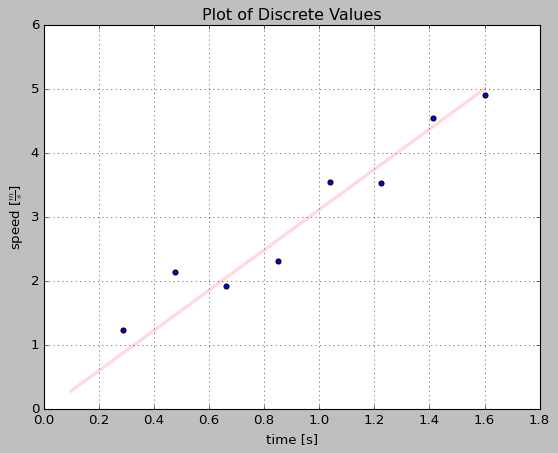

In [ ]:
#@title Plot the data with a fit on top with more statistics
#@markdown *Skip steps to streamline plotting*

#### We want to display the data with the fit superimposed
plt.style.use("classic") #ggplot, seaborn-poster, seaborn-notebook also work

#### Plot the data
plt.scatter(indepValues, depValues,
            c='blue',      # optional: spells the color of the marker
            marker='o',    # optional: type of marker, (useful if you superimpose graphs)
          )

# Always label your axes and plots
plt.title("Plot of Discrete Values")
plt.xlabel("time [s]")
plt.ylabel(r"speed [$\frac{m}{s}$]")  # embed LaTeX (r is needed so the backslash doesn't get interpreted)

# Display a grid so people can extrapolate
plt.grid(True)

# Force the display of the origin (0,0)
#    optional in some cases but necessary if you are trying to decide on how to 
#    fit values or testing a linearization method is working (assumes direct 
#    relationships)
plt.xlim(left=0.0)  # optional: force the presentation of 0 on the x axis
plt.ylim(bottom=0.0)  # optional: force the presentation of 0 on the y axis

#############################################################################
# Here is the fit with the covariant matrix
((m,b),C)=np.polyfit(indepValues, depValues, 1, cov='unscaled')
sigmaSq = np.sum((depValues-(m*indepValues+b))**2)/len(indepValues) # sum of square deviation
# a crude estimate of the variance of the coefficients can be gotten from the covariant matrix 
(dm, db) = (np.sqrt(C[0,0]*sigmaSq), np.sqrt(C[1,1]*sigmaSq))

print(f"y = {m:5.3f} x + {b:5.3f}")
print(f"slope: {m:5.3f}±{dm:5.3f} m/s^2")  
print(f"intercept: {b:5.3f}±{db:5.3f} m/s")

#
#############################################################################

#### Plot the fit on top.
plt.plot(indepValues, m * indepValues + b,
            c='pink',      # optional: spells the color of the marker
            alpha = 0.6,   # optional: sets transparency 0-invisible to 1-opaque
            linewidth = 3.0,
          )

#### now show the graph
plt.show()
